<a href="https://colab.research.google.com/github/EsraaMosaad/NTI_training/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# !cp /content/drive/MyDrive/Colab_Notebooks/kaggle_API_credentials/kaggle.json ~/.kaggle/kaggle.json
# !chmod 600 ~/.kaggle/kaggle.json



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !kaggle datasets download -d rpaguirre/tesla-stock-price
# !unzip /content/tesla-stock-price.zip

tesla-stock-price.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/tesla-stock-price.zip
  inflating: Tesla.csv - Tesla.csv.csv  


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
import pandas as pd
data = pd.read_csv("/content/Tesla.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


60     9/23/2010
61     9/24/2010
62     9/27/2010
63     9/28/2010
64     9/29/2010
65     9/30/2010
66     10/1/2010
67     10/4/2010
68     10/5/2010
69     10/6/2010
70     10/7/2010
71     10/8/2010
72    10/11/2010
73    10/12/2010
74    10/13/2010
75    10/14/2010
76    10/15/2010
77    10/18/2010
78    10/19/2010
79    10/20/2010
80    10/21/2010
81    10/22/2010
82    10/25/2010
83    10/26/2010
84    10/27/2010
85    10/28/2010
86    10/29/2010
87     11/1/2010
88     11/2/2010
89     11/3/2010
90     11/4/2010
91     11/5/2010
92     11/8/2010
93     11/9/2010
94    11/10/2010
95    11/11/2010
96    11/12/2010
97    11/15/2010
98    11/16/2010
99    11/17/2010
Name: Date, dtype: object

In [ ]:
# data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.head(100)
data['Open'][60]

19.889999

In [ ]:
data.shape
data['Open'][60]

19.889999

In [ ]:
import numpy as np
count=0
x=[]
y=[]
date=[]
for i in range(60,data.shape[0]):
    x_data=data['Open'][count:i]
    x_data=np.array(x_data)
    x.append(x_data)
    y.append(data['Open'][i])
    date.append(data['Date'][i][0:5])
    # print(i,count,data['Date'][i][0:5])
    count +=1
df = pd.DataFrame(x)
df['target']=y


60 0 9/23/
61 1 9/24/
62 2 9/27/
63 3 9/28/
64 4 9/29/
65 5 9/30/
66 6 10/1/
67 7 10/4/
68 8 10/5/
69 9 10/6/
70 10 10/7/
71 11 10/8/
72 12 10/11
73 13 10/12
74 14 10/13
75 15 10/14
76 16 10/15
77 17 10/18
78 18 10/19
79 19 10/20
80 20 10/21
81 21 10/22
82 22 10/25
83 23 10/26
84 24 10/27
85 25 10/28
86 26 10/29
87 27 11/1/
88 28 11/2/
89 29 11/3/
90 30 11/4/
91 31 11/5/
92 32 11/8/
93 33 11/9/
94 34 11/10
95 35 11/11
96 36 11/12
97 37 11/15
98 38 11/16
99 39 11/17
100 40 11/18
101 41 11/19
102 42 11/22
103 43 11/23
104 44 11/24
105 45 11/26
106 46 11/29
107 47 11/30
108 48 12/1/
109 49 12/2/
110 50 12/3/
111 51 12/6/
112 52 12/7/
113 53 12/8/
114 54 12/9/
115 55 12/10
116 56 12/13
117 57 12/14
118 58 12/15
119 59 12/16
120 60 12/17
121 61 12/20
122 62 12/21
123 63 12/22
124 64 12/23
125 65 12/27
126 66 12/28
127 67 12/29
128 68 12/30
129 69 12/31
130 70 1/3/2
131 71 1/4/2
132 72 1/5/2
133 73 1/6/2
134 74 1/7/2
135 75 1/10/
136 76 1/11/
137 77 1/12/
138 78 1/13/
139 79 1/14/
140 80 1/1

In [ ]:
from sklearn.model_selection import train_test_split
data_60=df.iloc[:,0:60]
X_train, X_test, y_train, y_test = train_test_split(data_60,df['target'], test_size=0.2)

In [ ]:
model = Sequential()
model.add(Dense(200,input_shape=(60,), activation="relu"))
model.add(Dense(100,input_shape=(200,), activation="relu"))
model.add(Dense(1,input_shape=(100,), activation="linear"))

In [ ]:
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import tensorflow as tf 
model.compile(tf.keras.optimizers.Adam(learning_rate=0.001),loss= MeanSquaredLogarithmicError(),metrics=[MeanSquaredLogarithmicError()])

history = model.fit(
    X_train, 
    y_train, 
    epochs=20, 
    batch_size=100,
    validation_data=(X_test,y_test)
)

Epoch 1/20
14/14 [==============================] - 2s 43ms/step - loss: 3.7379 - mean_squared_logarithmic_error: 3.5099 - val_loss: 0.3054 - val_mean_squared_logarithmic_error: 0.3074
Epoch 2/20
14/14 [==============================] - 0s 13ms/step - loss: 0.1145 - mean_squared_logarithmic_error: 0.1117 - val_loss: 0.0186 - val_mean_squared_logarithmic_error: 0.0181
Epoch 3/20
14/14 [==============================] - 0s 8ms/step - loss: 0.0400 - mean_squared_logarithmic_error: 0.0378 - val_loss: 0.0238 - val_mean_squared_logarithmic_error: 0.0229
Epoch 4/20
14/14 [==============================] - 0s 8ms/step - loss: 0.0242 - mean_squared_logarithmic_error: 0.0245 - val_loss: 0.0139 - val_mean_squared_logarithmic_error: 0.0133
Epoch 5/20
14/14 [==============================] - 0s 12ms/step - loss: 0.0145 - mean_squared_logarithmic_error: 0.0145 - val_loss: 0.0121 - val_mean_squared_logarithmic_error: 0.0115
Epoch 6/20
14/14 [==============================] - 0s 9ms/step - loss: 0.011

In [ ]:
pred=model.predict(X_test)

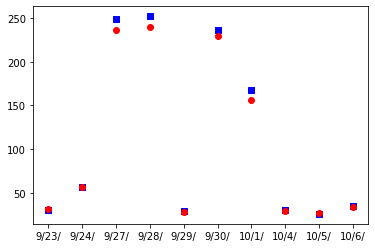

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(date[:10], pred[:10], c='b', marker="s", label='first')
ax1.scatter(date[:10],y_test[:10], c='r', marker="o", label='second')
plt.show()